# 検定

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

## 多項分布に関する検定

### カイ2乗適合度検定

クロス表（多項分布）において、観測データの確率分布が理論上想定される確率分布に等しいかどうかを調べる検定がカイ2乗適合度検定である。


$n$個のデータが$K$個のカテゴリーに分類され、それぞれ$X_1, \dots, X_K$個観測されたとする（$X_1 + \cdots + X_K = n$）。

それぞれのカテゴリーに入る（真の）確率を$p_1, \dots, p_K$とすると$p_1 + \cdots + p_K=1$である。

$p_i$は$X_i/n$で推定される。理論上想定される確率が$\pi_1, \dots, \pi_K$であるとするとき、観測データに基づいた確率分布が理論上想定される確率分布に等しいか否かを検定する問題は、次のように定式化される。

$$
\begin{align}
H_0&: p_1 = \pi_1, \dots, p_K = \pi_K\\
H_1&: p_i \neq \pi_i \ (\text{ある}i\text{に対して})
\end{align}
$$

これをカテゴリーに関する**カイ2乗適合度検定**（chi-square test of goodness of fit）という。

$H_0$が正しいとき、カテゴリー$C_i$に入る個数が$n \times \pi_i$になり、これを理論値あるいは期待度数という。
観測データに基づいた確率分布と理論上想定される確率分布の差は、観測値と理論値の差の二乗

$$
(X_1 - n \pi_1)^2, \dots, (X_K - n \pi_K)^2
$$

にもとづいて測ることができるので、**ピアソンのカイ2乗検定統計量**

$$
Q(\boldsymbol{X}, \boldsymbol{\pi})
= \sum^K_{i=1} \frac{(X_i - n\pi_i)^2}{n \pi_i}
$$

を使って検定を行うことができる
（ここで$\boldsymbol{X}=(X_1, \dots, X_K), \boldsymbol{\pi}=(\pi_1, \dots, \pi_K)$）。

$Q(\boldsymbol{X}, \boldsymbol{\pi})$は$H_0$のもとで$\chi^2_{K-1}$に収束するため、

$$
Q(\boldsymbol{X}, \boldsymbol{\pi}) > \chi^2_{K-1, \alpha}
\implies \text{reject}
$$

とする検定を考えればよいことになる。ただし$\chi^2_{K-1, \alpha}$は$\chi^2_{K-1}$分布の上側$100\alpha$%点である。


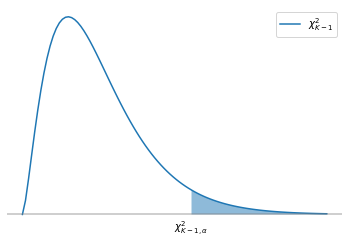

In [177]:
from scipy.stats import chi2

x = np.linspace(0, 20, 100)
dist = chi2(df=5)
y = dist.pdf(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\chi^2_{K-1}$")
ax.axhline(color="gray", alpha=0.5)

alpha = 0.95
t = dist.ppf(alpha)
ax.text(t, -dist.pdf(t) * 0.7, r"$\chi^2_{K-1, \alpha}$", ha="center")
ax.fill_between(x=x[x > t], y1=y[x > t], alpha=.5)

ax.axis("off")
ax.legend()
fig.show()

:::{dropdown} （命題） $Q(\boldsymbol{X}, \boldsymbol{\pi})$は$H_0$のもとで$\chi^2_{K-1}$に収束する

（証明）

:::

### 例

日本人1000人の血液型を調べたところ、次のようになったとする。


In [248]:
import pandas as pd
from scipy.stats import multinomial, chi2
n = 1000
pi = np.array([.4, .2, .3, .1])  # 理論確率

# データの生成
m = multinomial(n=1, p=pi)
x = m.rvs(size=n, random_state=100).sum(axis=0)
d = pd.DataFrame([x], columns=["A", "B", "O", "AB"], index=["観測度数"])
d

,A,B,O,AB
観測度数,371,200,337,92


日本人における血液型の割合は、おおよそＡ型40％、Ｂ型20％、Ｏ型30％、ＡＢ型10％といわれている（[一般社団法人日本血液製剤協会](http://www.ketsukyo.or.jp/glossary/a01.html)）。

これを理論確率$\boldsymbol{\pi}$とすると、期待度数（理論値）$n \times \boldsymbol{\pi}$は次のようになる

In [249]:
d.loc["期待度数", :] = pi * n
d

,A,B,O,AB
観測度数,371.0,200.0,337.0,92.0
期待度数,400.0,200.0,300.0,100.0


ピアソンのカイ2乗検定統計量

$$
Q(\boldsymbol{X}, \boldsymbol{\pi})
= \sum^K_{i=1} \frac{(X_i - n\pi_i)^2}{n \pi_i}
$$

を計算すると次のようになる

In [250]:
Q = sum( (x - pi * n)**2 / (pi * n) )
Q

7.305833333333333

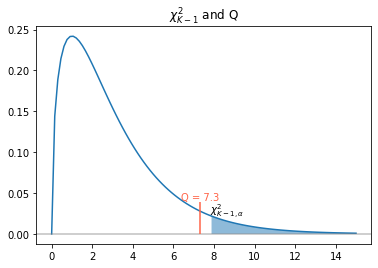

In [255]:
from scipy.stats import chi2

K = len(d.columns)
df = K - 1

x = np.linspace(0, 15, 100)
dist = chi2(df=df)
y = dist.pdf(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(color="gray", alpha=0.5)
ax.set(title=r"$\chi^2_{K-1}$ and Q")

alpha = 0.95
t = dist.ppf(alpha)
ax.text(t, dist.pdf(t) * 1.1, r"$\chi^2_{K-1, \alpha}$")
ax.fill_between(x=x[x > t], y1=y[x > t], alpha=.5)

ax.vlines(Q, 0, dist.pdf(Q) * 1.4, color="tomato")
ax.text(Q, dist.pdf(Q) * 1.5, f"Q = {Q:.1f}", ha="center", color="tomato")

fig.show()

### 独立性の検定

TODO